<CENTER><img src="opendata-top-transblack.png" style="width:40%"></CENTER>

<CENTER><h1>Simple CVS to ROOT C++ notebook example</h1></CENTER>

In [1]:
//%jsroot on

In [2]:
#include "Riostream.h"
#include "TString.h"
#include "TFile.h"
#include "TTree.h"
#include "TSystem.h"
#include <stdio.h>
#include <stdlib.h>

Download the data

In [3]:
//This two lines can be commented out. You just need it once, and in case the CVS file was not provided already
system("wget https://docs.google.com/spreadsheets/d/1nH8J5PViu8yRVMAY5q3ydS6Onqv5ZOh3tdeM5MP9YQo/export?format=csv -O ages.csv");

//If the file is downloaded with the line above, you *need* to remove the first line of the CSV file

--2019-09-27 23:20:33--  https://docs.google.com/spreadsheets/d/1nH8J5PViu8yRVMAY5q3ydS6Onqv5ZOh3tdeM5MP9YQo/export?format=csv
Resolving docs.google.com (docs.google.com)... 172.217.30.174, 2800:3f0:4002:807::200e
Connecting to docs.google.com (docs.google.com)|172.217.30.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘ages.csv’

ages.csv                [ <=>                  ]     692  --.-KB/s   in 0s     

2019-09-27 23:20:34 (13.3 MB/s) - ‘ages.csv’ saved [692]



Create a ROOT file to save the data that now is in the CSV

In [4]:
TString dir = gSystem->UnixPathName(__FILE__);
dir.ReplaceAll("ages.C","");
dir.ReplaceAll("/./","/");

TFile *f = new TFile("ages.root","RECREATE");

Read the CSV file and save the values into a ROOT file

In [5]:
TTree *tree = new TTree("data","data from csv file");
// The file inside has -------->   "Room","room1","room2","room3","room4","room5","room6","room7","room8","room9","room10"
tree->ReadFile("ages.csv","Room/C:room1/f:room2/F:room3/F:room4/F:room5/F:room6/F:room7/F:room8/F:room9/F:room10/F",',');
f->Write();

TTree::ReadStream:0: RuntimeWarning: Couldn't read formatted data in "room1" for branch room1 on line 1; ignoring line
TTree::ReadStream:0: RuntimeWarning: Read too few columns (2 < 11) in line 1; ignoring line
TTree::ReadStream:0: RuntimeWarning: Read too few columns (10 < 11) in line 14; ignoring line
TTree::ReadStream:0: RuntimeWarning: Read too few columns (10 < 11) in line 15; ignoring line


Let's plot some stats of the files

In [6]:
system("ls -lhrt ages*");
system("echo");
system("echo 'This dataset contains the below number of data points / rows'");
system("wc -l ages.csv");

-rw-r--r-- 1 summerstudent users  692 Sep 27 23:20 ages.csv
-rw-r--r-- 1 summerstudent users 6.8K Sep 27 23:20 ages.root

This dataset contains the below number of data points / rows
14 ages.csv


Let's open the new root file

In [7]:
TFile *_file0 = TFile::Open("ages.root");

## Let's do some visualisations

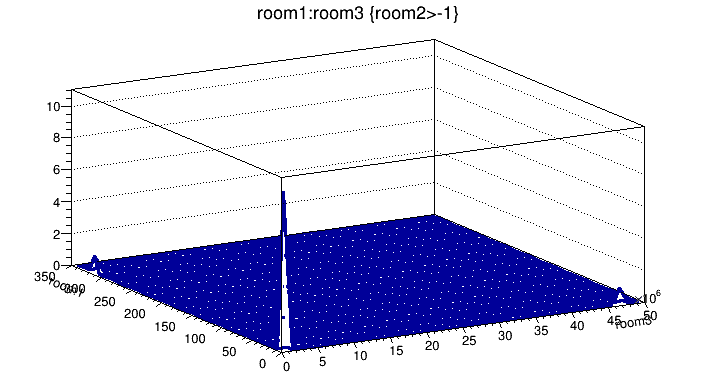

In [8]:
TCanvas *example3Dplot = new TCanvas("example3Dplot","example 3D plot",10,10,720,420);
data->Draw("room1:room3","room2>-1","SURF");
example3Dplot->Draw();

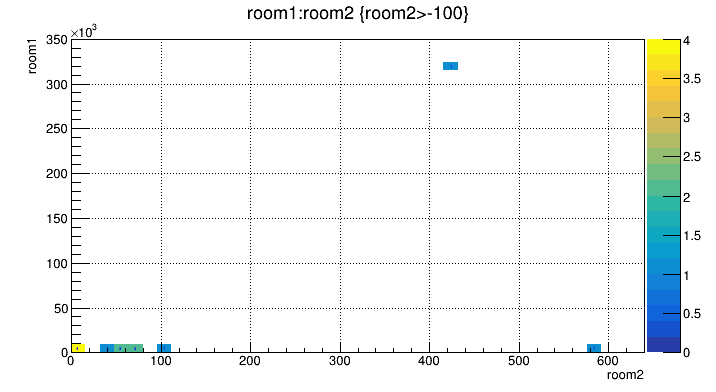

In [9]:
TCanvas *example2Dplot = new TCanvas("example2Dplot","example 2D plot",10,10,720,420);
data->Draw("room1:room2","room2>-100","textcolz");
example2Dplot->SetGrid();
example2Dplot->Draw();

<CENTER><h2>this is my title</h2>
<p>...write more documentation</p></CENTER>

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: dfdglot


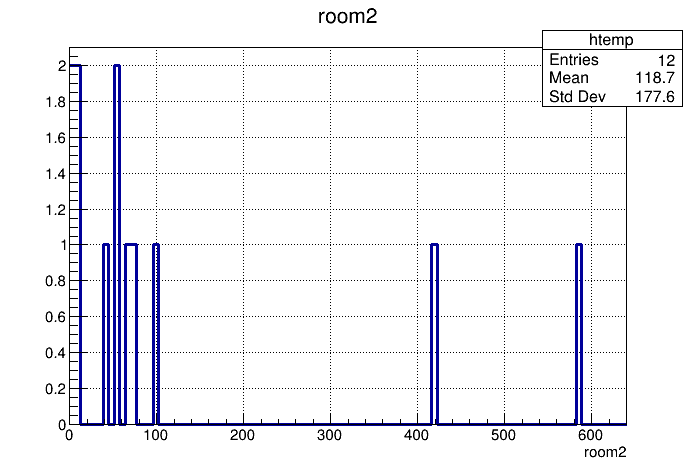

In [14]:
TCanvas *example1Dplot = new TCanvas("example1Dplot","example 1D plot",10,10,400,400);
data->Draw("room1");
example1Dplot->SetGrid();
example1Dplot->Draw();